# HRSA Maternal & Child Health Data

## Importing Packages

In [8]:
import numpy as np
from scipy import stats
import pandas as pd 

In [9]:
df = pd.read_csv('HRSA 20202022 5 states.csv')

## Checking data

### Adjustments to file made becuase headers did not convert from the Excel file to CSV file correctly.

In [10]:
df.shape

(419, 32)

In [11]:
df = df.drop(df.columns[13:31], axis=1)

In [12]:
df.head()

,Filtered By: State = 'District of Columbia' OR State = 'New Jersey' OR State = 'Puerto Rico' OR State = 'New York' OR State = 'Texas',Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,County FIPS Code,HRSA Region,State,County,Hospitals with Obstetric Care (#),"OB-GYN Provider Rate (per 100,000)","Infant Mortality Rate (per 1,000) 2020-2022",Low Birth Weight (%) 2020-2022,Preterm Births (%) 2020-2022,Prenatal Care in the 1st Trimester (%) 2020-2022,Population Density - Women 15-44 Years of Age,NCHS Urban-Rural Classification,NCHS Urban-Rural Code,NaN
3,11001,3,District of Columbia,District of Columbia,4,60,5.3,9.6,10,72,2881.6,Large central metro,1,NaN
4,34001,2,New Jersey,Atlantic County,1,13.3,5.8,8.4,9.6,75.7,87.4,Medium metro,3,NaN


In [13]:
#remove last column 
df = df.iloc[:, :-1]

In [14]:
df.head()

,Filtered By: State = 'District of Columbia' OR State = 'New Jersey' OR State = 'Puerto Rico' OR State = 'New York' OR State = 'Texas',Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,County FIPS Code,HRSA Region,State,County,Hospitals with Obstetric Care (#),"OB-GYN Provider Rate (per 100,000)","Infant Mortality Rate (per 1,000) 2020-2022",Low Birth Weight (%) 2020-2022,Preterm Births (%) 2020-2022,Prenatal Care in the 1st Trimester (%) 2020-2022,Population Density - Women 15-44 Years of Age,NCHS Urban-Rural Classification,NCHS Urban-Rural Code
3,11001,3,District of Columbia,District of Columbia,4,60,5.3,9.6,10,72,2881.6,Large central metro,1
4,34001,2,New Jersey,Atlantic County,1,13.3,5.8,8.4,9.6,75.7,87.4,Medium metro,3


In [15]:
df = df.drop([0, 1])

# Reset the index
df = df.reset_index(drop=True)

# Rename the columns
df.columns = [
    'County FIPS Code', 'HRSA Region', 'State', 'County', 
    'Hospitals with Obstetric Care (#)', 'OB-GYN Provider Rate (per 100,000)', 
    'Infant Mortality Rate (per 1,000) 2020-2022', 'Low Birth Weight (%) 2020-2022', 
    'Preterm Births (%) 2020-2022', 'Prenatal Care in the 1st Trimester (%) 2020-2022', 
    'Population Density - Women 15-44 Years of Age', 'NCHS Urban-Rural Classification', 
    'NCHS Urban-Rural Code'
]

# Display the cleaned DataFrame
df.head()

,County FIPS Code,HRSA Region,State,County,Hospitals with Obstetric Care (#),"OB-GYN Provider Rate (per 100,000)","Infant Mortality Rate (per 1,000) 2020-2022",Low Birth Weight (%) 2020-2022,Preterm Births (%) 2020-2022,Prenatal Care in the 1st Trimester (%) 2020-2022,Population Density - Women 15-44 Years of Age,NCHS Urban-Rural Classification,NCHS Urban-Rural Code
0,County FIPS Code,HRSA Region,State,County,Hospitals with Obstetric Care (#),"OB-GYN Provider Rate (per 100,000)","Infant Mortality Rate (per 1,000) 2020-2022",Low Birth Weight (%) 2020-2022,Preterm Births (%) 2020-2022,Prenatal Care in the 1st Trimester (%) 2020-2022,Population Density - Women 15-44 Years of Age,NCHS Urban-Rural Classification,NCHS Urban-Rural Code
1,11001,3,District of Columbia,District of Columbia,4,60,5.3,9.6,10,72,2881.6,Large central metro,1
2,34001,2,New Jersey,Atlantic County,1,13.3,5.8,8.4,9.6,75.7,87.4,Medium metro,3
3,34003,2,New Jersey,Bergen County,5,48.1,3.1,7.3,9.4,84.8,737.2,Large fringe metro,2
4,34005,2,New Jersey,Burlington County,1,19,4.2,7.4,9,81.4,103.4,Large fringe metro,2


In [16]:
df.to_csv('HRSA fixed chart.csv')

In [17]:
#how many distinct elements in the state column 
df['State'].unique()

array(['State', 'District of Columbia', 'New Jersey', 'New York', 'Texas',
       'Puerto Rico'], dtype=object)

I deleted DC somehow when attempting to clean up the rows. I will start again and edit the file to be correct with headers at a later time

In [18]:
#calculate the frequency of each state
df['State'].value_counts()

State
Texas                   254
Puerto Rico              78
New York                 62
New Jersey               21
State                     1
District of Columbia      1
Name: count, dtype: int64

In [19]:
#calculate the proportions of each state    
df['State'].value_counts(normalize=True)

State
Texas                   0.609113
Puerto Rico             0.187050
New York                0.148681
New Jersey              0.050360
State                   0.002398
District of Columbia    0.002398
Name: proportion, dtype: float64

In [20]:
# Convert the 'Infant Mortality Rate (per 1,000) 2020-2022' column to numeric
df['Infant Mortality Rate (per 1,000) 2020-2022'] = pd.to_numeric(df['Infant Mortality Rate (per 1,000) 2020-2022'], errors='coerce')

# Calculate the mean of the infant mortality rate separated by state
df.groupby('State')['Infant Mortality Rate (per 1,000) 2020-2022'].mean()

State
District of Columbia    5.300000
New Jersey              4.190476
New York                5.082258
Puerto Rico             7.452055
State                        NaN
Texas                   5.865939
Name: Infant Mortality Rate (per 1,000) 2020-2022, dtype: float64

In [21]:
#can you make this a table
df.groupby('State')['Infant Mortality Rate (per 1,000) 2020-2022'].mean().reset_index()

,State,"Infant Mortality Rate (per 1,000) 2020-2022"
0,District of Columbia,5.300000
1,New Jersey,4.190476
2,New York,5.082258
3,Puerto Rico,7.452055
4,State,NaN
5,Texas,5.865939


In [22]:
#calculate the overall Sd of the infant mortality rate
df['Infant Mortality Rate (per 1,000) 2020-2022'].std()

np.float64(1.676547480030288)

In [23]:
#calculate the Standard deviation of the infant mortality rate separated by state and display the results in a table including the mean by state
df.groupby('State')['Infant Mortality Rate (per 1,000) 2020-2022'].agg(['mean', 'std']).reset_index()


,State,mean,std
0,District of Columbia,5.300000,NaN
1,New Jersey,4.190476,1.393881
2,New York,5.082258,1.082124
3,Puerto Rico,7.452055,2.025882
4,State,NaN,NaN
5,Texas,5.865939,1.321108


In [24]:
#describe the summary statistics of hospitals with obstetric care
df['Hospitals with Obstetric Care (#)'].describe()

count     417
unique     13
top         0
freq      244
Name: Hospitals with Obstetric Care (#), dtype: object

In [25]:
# Convert the 'Hospitals with Obstetric Care (#)' column to numeric
df['Hospitals with Obstetric Care (#)'] = pd.to_numeric(df['Hospitals with Obstetric Care (#)'], errors='coerce')

# Create a table that shows the mean and standard deviation of the number of hospitals with obstetric care separated by state
df.groupby('State')['Hospitals with Obstetric Care (#)'].agg(['mean', 'std']).reset_index()

,State,mean,std
0,District of Columbia,4.000000,NaN
1,New Jersey,2.000000,1.581139
2,New York,1.532258,1.964586
3,Puerto Rico,0.076923,0.268194
4,State,NaN,NaN
5,Texas,0.787402,1.833504


In [26]:
#can you create a correlation between the infant mortality rate and the number of hospitals with obstetric care seperated by state
df.groupby('State')[['Infant Mortality Rate (per 1,000) 2020-2022', 'Hospitals with Obstetric Care (#)']].corr().reset_index()



,State,level_1,"Infant Mortality Rate (per 1,000) 2020-2022",Hospitals with Obstetric Care (#)
0,District of Columbia,"Infant Mortality Rate (per 1,000) 2020-2022",NaN,NaN
1,District of Columbia,Hospitals with Obstetric Care (#),NaN,NaN
2,New Jersey,"Infant Mortality Rate (per 1,000) 2020-2022",1.000000,-0.294929
3,New Jersey,Hospitals with Obstetric Care (#),-0.294929,1.000000
4,New York,"Infant Mortality Rate (per 1,000) 2020-2022",1.000000,-0.421915
5,New York,Hospitals with Obstetric Care (#),-0.421915,1.000000
6,Puerto Rico,"Infant Mortality Rate (per 1,000) 2020-2022",1.000000,0.017047
7,Puerto Rico,Hospitals with Obstetric Care (#),0.017047,1.000000
8,State,"Infant Mortality Rate (per 1,000) 2020-2022",NaN,NaN
9,State,Hospitals with Obstetric Care (#),NaN,NaN


In [27]:
#remake this chart and put hospitals first
df.groupby('State')[['Hospitals with Obstetric Care (#)', 'Infant Mortality Rate (per 1,000) 2020-2022']].corr().reset_index()

,State,level_1,Hospitals with Obstetric Care (#),"Infant Mortality Rate (per 1,000) 2020-2022"
0,District of Columbia,Hospitals with Obstetric Care (#),NaN,NaN
1,District of Columbia,"Infant Mortality Rate (per 1,000) 2020-2022",NaN,NaN
2,New Jersey,Hospitals with Obstetric Care (#),1.000000,-0.294929
3,New Jersey,"Infant Mortality Rate (per 1,000) 2020-2022",-0.294929,1.000000
4,New York,Hospitals with Obstetric Care (#),1.000000,-0.421915
5,New York,"Infant Mortality Rate (per 1,000) 2020-2022",-0.421915,1.000000
6,Puerto Rico,Hospitals with Obstetric Care (#),1.000000,0.017047
7,Puerto Rico,"Infant Mortality Rate (per 1,000) 2020-2022",0.017047,1.000000
8,State,Hospitals with Obstetric Care (#),NaN,NaN
9,State,"Infant Mortality Rate (per 1,000) 2020-2022",NaN,NaN


In [28]:
#calculate this correlation for each state without the table 
df.groupby('State')[['Hospitals with Obstetric Care (#)', 'Infant Mortality Rate (per 1,000) 2020-2022']].corr().iloc[0::2, -1]

State                                                  
District of Columbia  Hospitals with Obstetric Care (#)         NaN
New Jersey            Hospitals with Obstetric Care (#)   -0.294929
New York              Hospitals with Obstetric Care (#)   -0.421915
Puerto Rico           Hospitals with Obstetric Care (#)    0.017047
State                 Hospitals with Obstetric Care (#)         NaN
Texas                 Hospitals with Obstetric Care (#)   -0.072877
Name: Infant Mortality Rate (per 1,000) 2020-2022, dtype: float64

In [29]:
#describe summary statistics of low birth weight column 
df['Low Birth Weight (%) 2020-2022'].describe()

count     417
unique     68
top       8.8
freq       20
Name: Low Birth Weight (%) 2020-2022, dtype: object

In [30]:
#convert the low birth weight column to numeric
df['Low Birth Weight (%) 2020-2022'] = pd.to_numeric(df['Low Birth Weight (%) 2020-2022'], errors='coerce')

In [31]:
#describe summary statistics of low birth weight column
df['Low Birth Weight (%) 2020-2022'].describe()

count    416.000000
mean       8.676683
std        1.305894
min        4.500000
25%        7.800000
50%        8.600000
75%        9.300000
max       13.100000
Name: Low Birth Weight (%) 2020-2022, dtype: float64

## Data Visualization

In [32]:
import seaborn
import matplotlib.pyplot

In [33]:
%config InlineBackend.figure_format = 'retina'

In [34]:
seaborn.set_style("whitegrid")

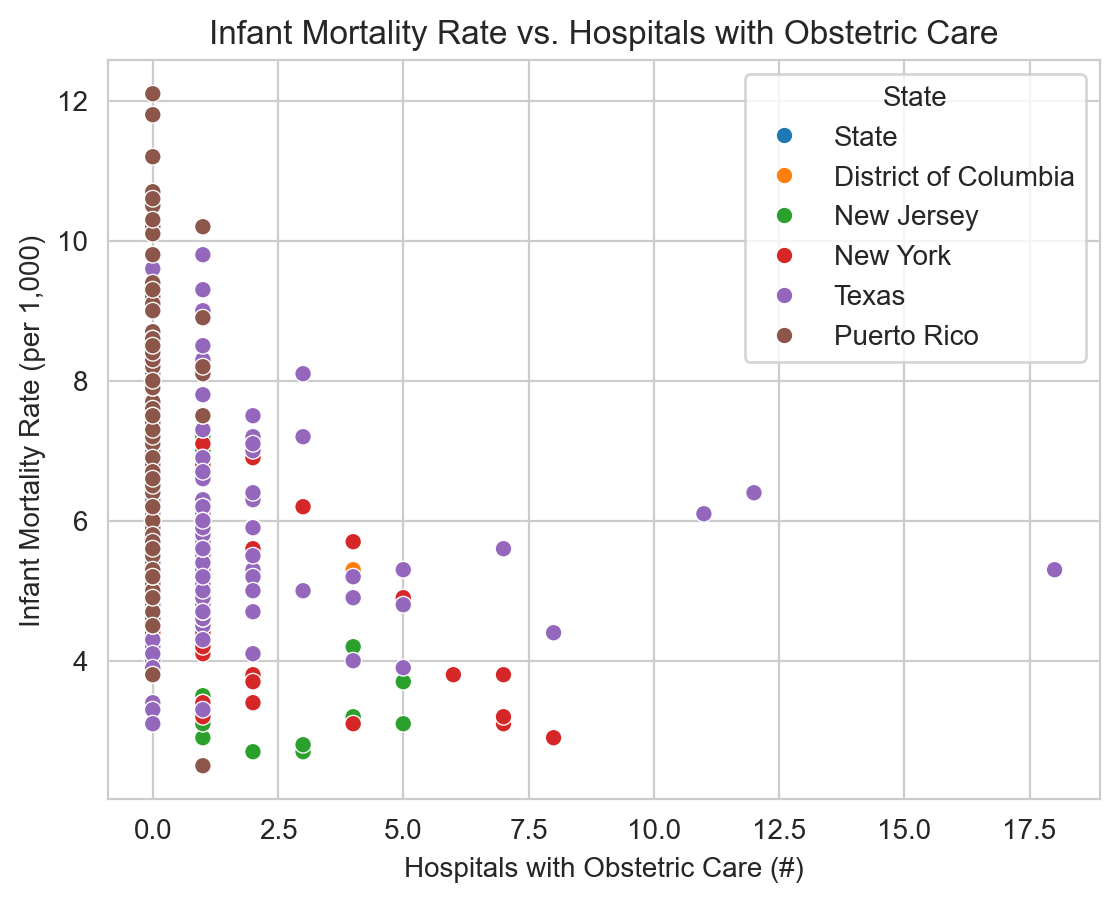

In [36]:
#use seaborn to create a scatterplot of the infant mortality rate and the number of hospitals with obstetric care
seaborn.scatterplot(data=df, x='Hospitals with Obstetric Care (#)', y='Infant Mortality Rate (per 1,000) 2020-2022', hue='State')
matplotlib.pyplot.title('Infant Mortality Rate vs. Hospitals with Obstetric Care')
matplotlib.pyplot.xlabel('Hospitals with Obstetric Care (#)')
matplotlib.pyplot.ylabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.legend(title='State')
matplotlib.pyplot.show()

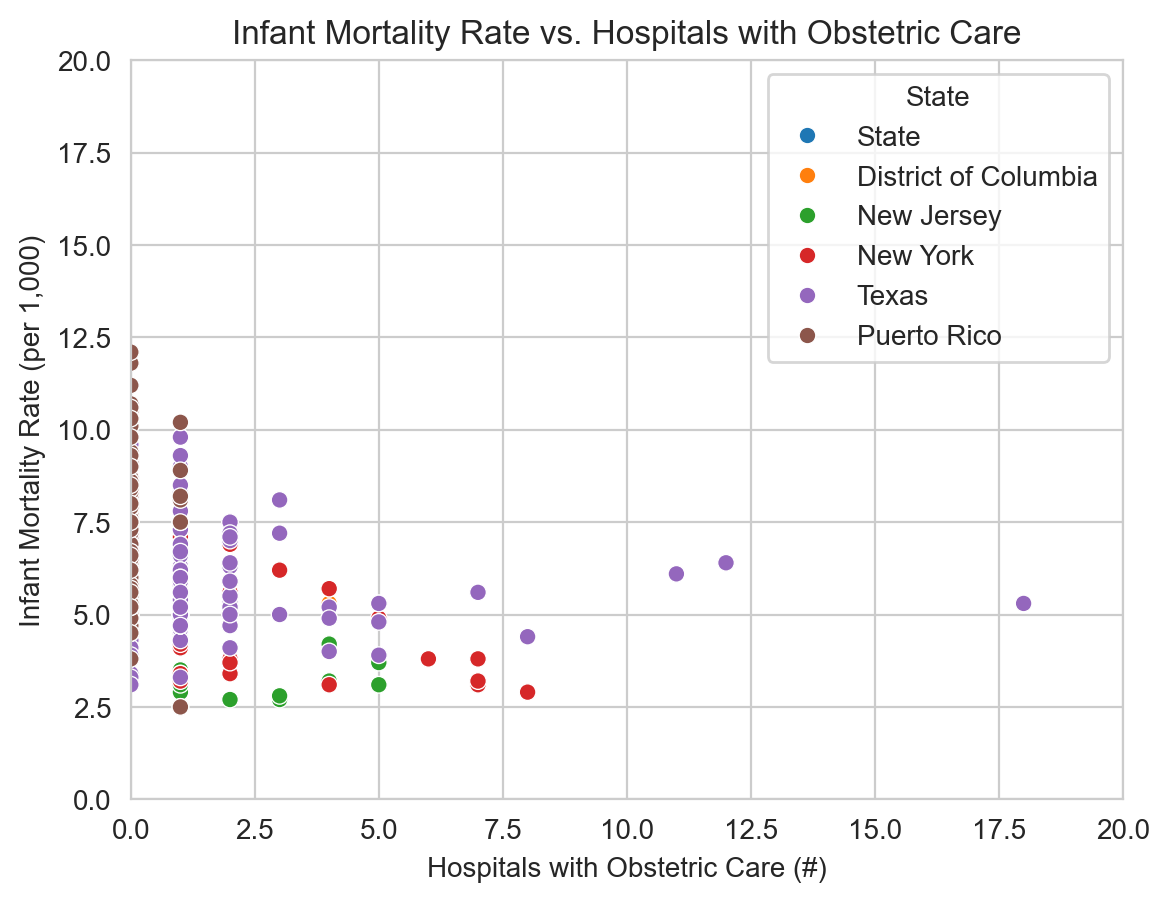

In [37]:
# can you remake this chart to zoom in on the data 
seaborn.scatterplot(data=df, x='Hospitals with Obstetric Care (#)', y='Infant Mortality Rate (per 1,000) 2020-2022', hue='State')
matplotlib.pyplot.xlim(0, 20)
matplotlib.pyplot.ylim(0, 20)
matplotlib.pyplot.title('Infant Mortality Rate vs. Hospitals with Obstetric Care')
matplotlib.pyplot.xlabel('Hospitals with Obstetric Care (#)')
matplotlib.pyplot.ylabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.legend(title='State')
matplotlib.pyplot.show()

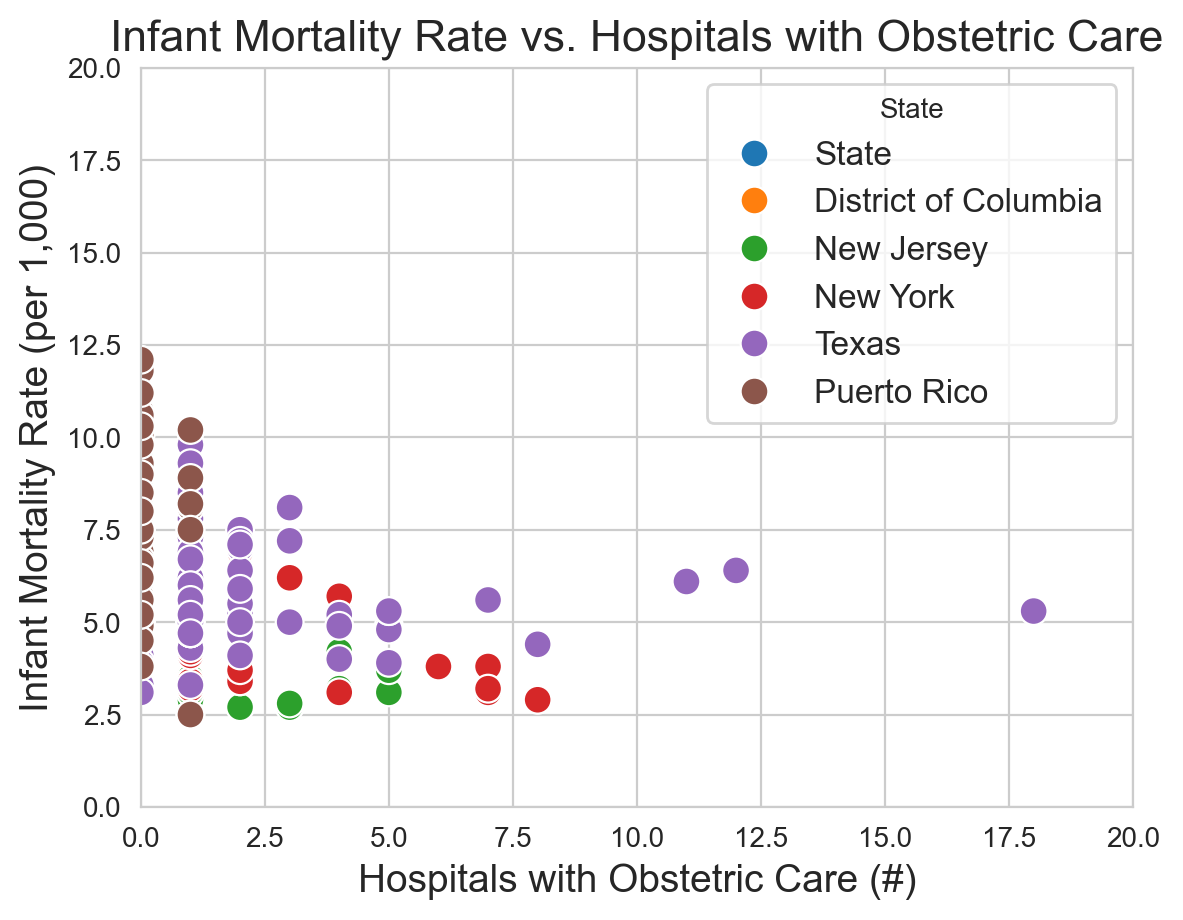

In [38]:
# can you make this chart a little more readable by changing the size of the points and the font size
seaborn.scatterplot(data=df, x='Hospitals with Obstetric Care (#)', y='Infant Mortality Rate (per 1,000) 2020-2022', hue='State', s=100)
matplotlib.pyplot.xlim(0, 20)
matplotlib.pyplot.ylim(0, 20)
matplotlib.pyplot.title('Infant Mortality Rate vs. Hospitals with Obstetric Care', fontsize=16)
matplotlib.pyplot.xlabel('Hospitals with Obstetric Care (#)', fontsize=14)
matplotlib.pyplot.ylabel('Infant Mortality Rate (per 1,000)', fontsize=14)
matplotlib.pyplot.legend(title='State', fontsize=12)
matplotlib.pyplot.show()

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/2629193788.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State', fontsize=12)


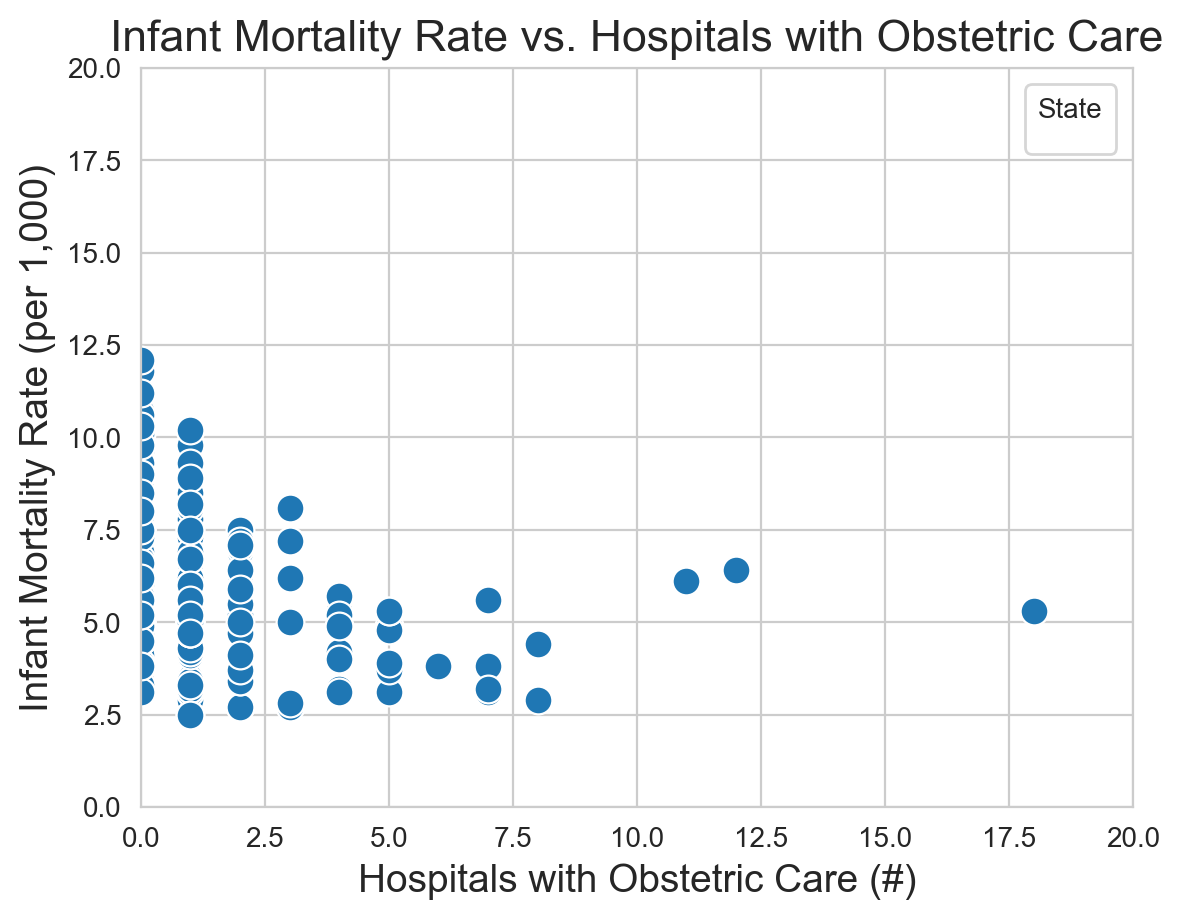

In [39]:
# make a skatter plot of hospitals with obstetric care and infant mortality rate without seperating by state
seaborn.scatterplot(data=df, x='Hospitals with Obstetric Care (#)', y='Infant Mortality Rate (per 1,000) 2020-2022', s=100)
matplotlib.pyplot.xlim(0, 20)
matplotlib.pyplot.ylim(0, 20)
matplotlib.pyplot.title('Infant Mortality Rate vs. Hospitals with Obstetric Care', fontsize=16)
matplotlib.pyplot.xlabel('Hospitals with Obstetric Care (#)', fontsize=14)
matplotlib.pyplot.ylabel('Infant Mortality Rate (per 1,000)', fontsize=14)
matplotlib.pyplot.legend(title='State', fontsize=12)
matplotlib.pyplot.show()

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/3285166929.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State')


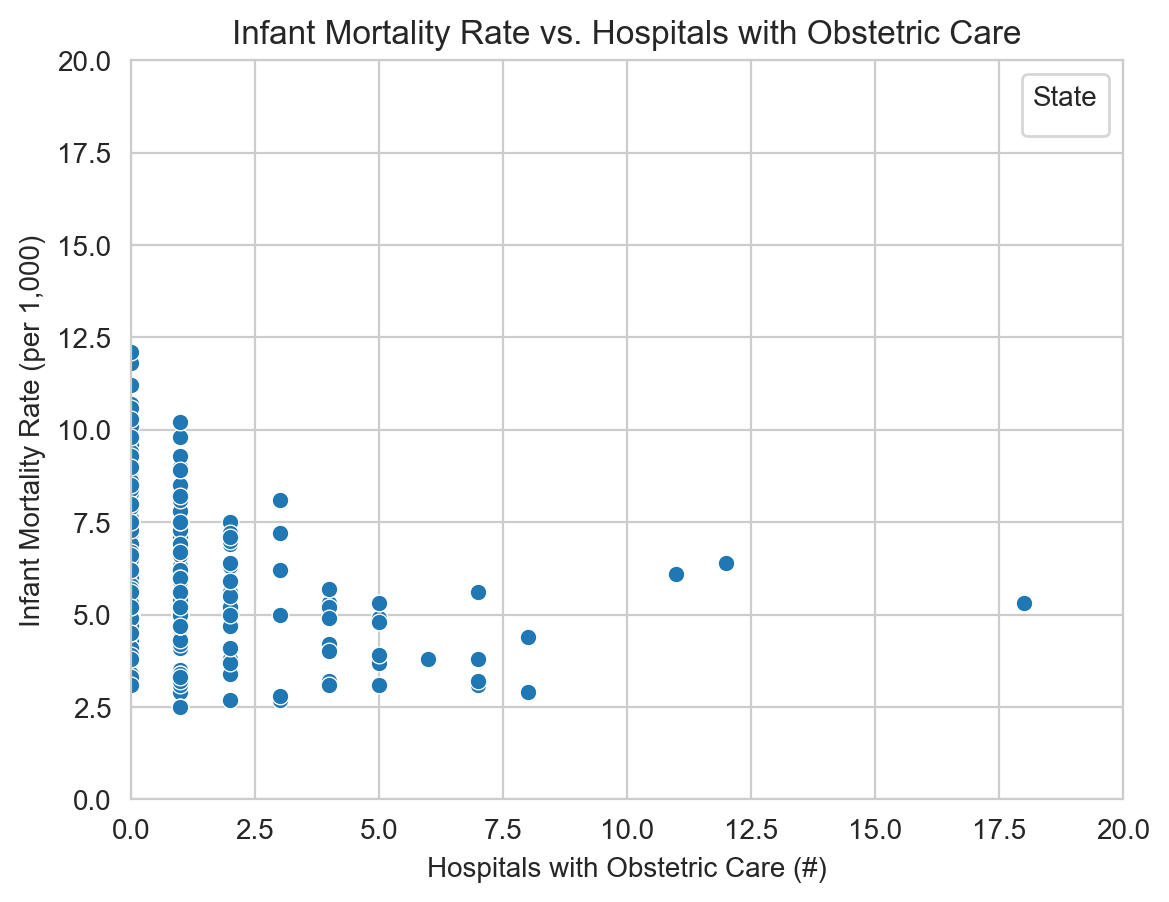

In [40]:
seaborn.scatterplot(data=df, x='Hospitals with Obstetric Care (#)', y='Infant Mortality Rate (per 1,000) 2020-2022')
matplotlib.pyplot.xlim(0, 20)
matplotlib.pyplot.ylim(0, 20)
matplotlib.pyplot.title('Infant Mortality Rate vs. Hospitals with Obstetric Care')
matplotlib.pyplot.xlabel('Hospitals with Obstetric Care (#)')
matplotlib.pyplot.ylabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.legend(title='State')
matplotlib.pyplot.show()

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/3856942897.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State')


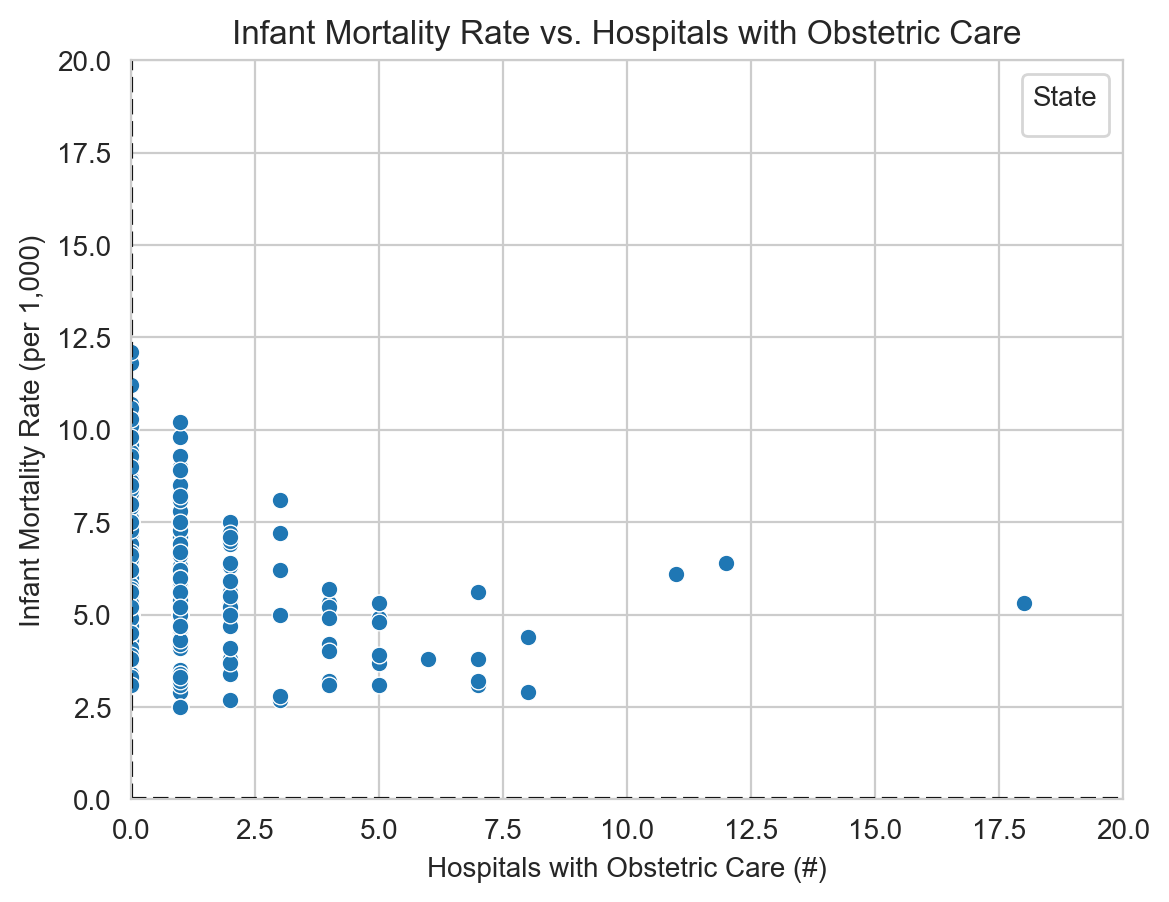

In [41]:
# can you move the bottom data line to the right so I can see the data better
seaborn.scatterplot(data=df, x='Hospitals with Obstetric Care (#)', y='Infant Mortality Rate (per 1,000) 2020-2022')
matplotlib.pyplot.xlim(0, 20)
matplotlib.pyplot.ylim(0, 20)
matplotlib.pyplot.title('Infant Mortality Rate vs. Hospitals with Obstetric Care')
matplotlib.pyplot.xlabel('Hospitals with Obstetric Care (#)')
matplotlib.pyplot.ylabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.legend(title='State')
matplotlib.pyplot.axhline(y=0, color='black', linestyle='--')
matplotlib.pyplot.axvline(x=0, color='black', linestyle='--')
matplotlib.pyplot.show()

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/2068868384.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State')


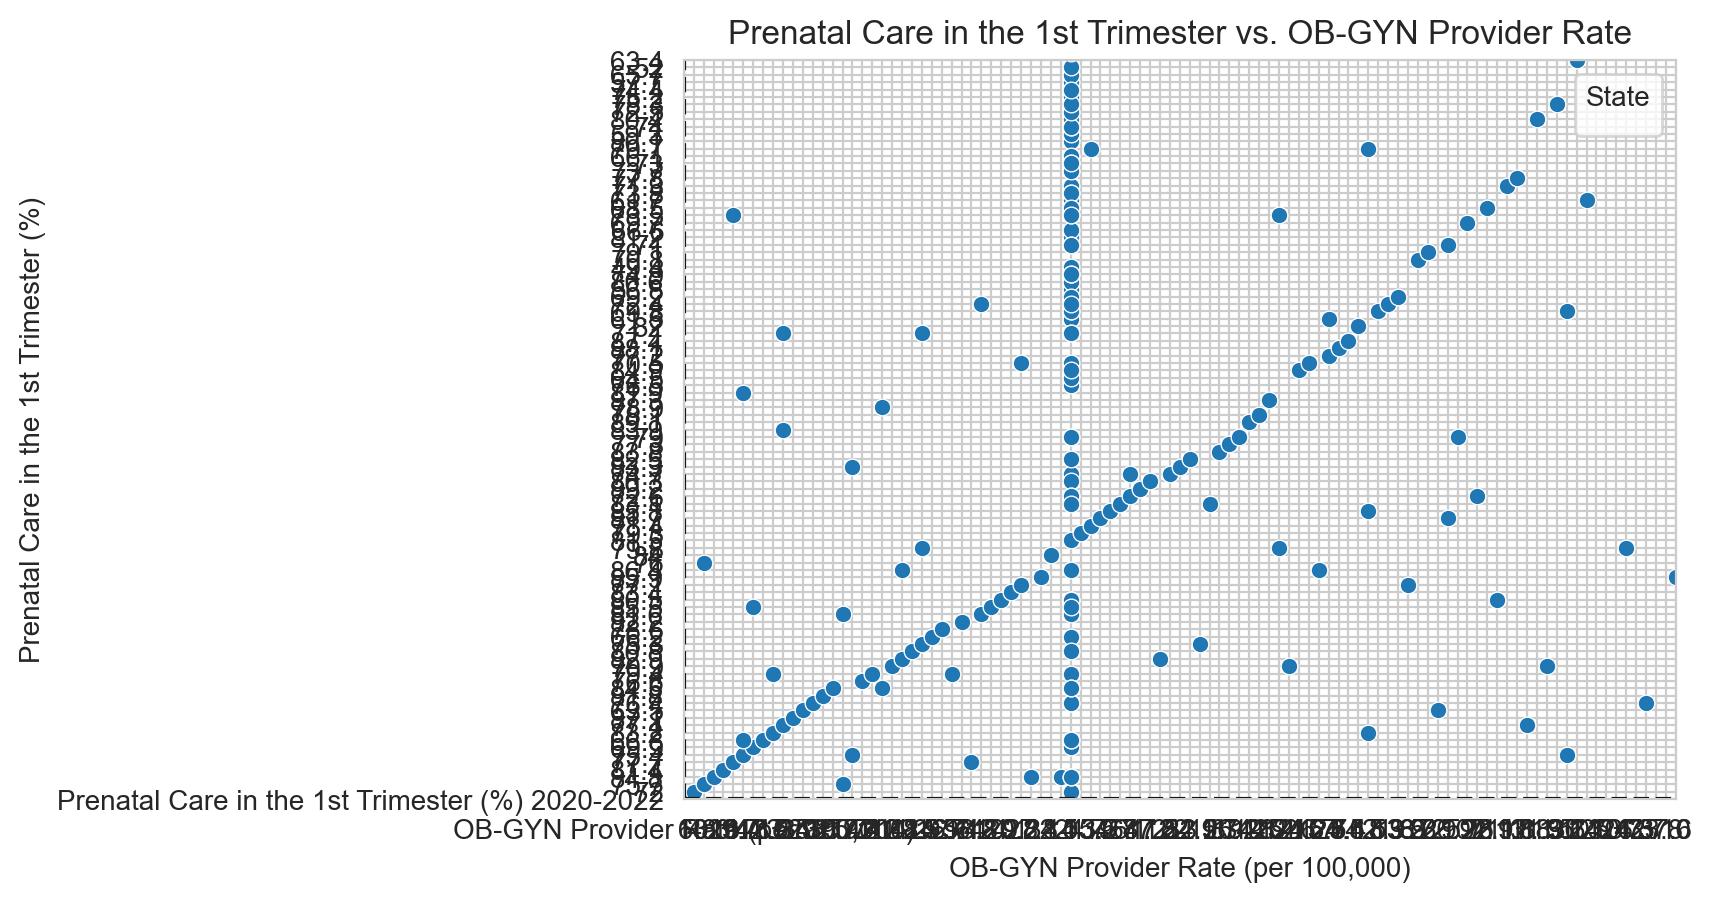

In [42]:
# can you skatter plot provider rate and prenatal care in the first trimester
seaborn.scatterplot(data=df, x='OB-GYN Provider Rate (per 100,000)', y='Prenatal Care in the 1st Trimester (%) 2020-2022')
matplotlib.pyplot.xlim(0, 100)
matplotlib.pyplot.ylim(0, 100)
matplotlib.pyplot.title('Prenatal Care in the 1st Trimester vs. OB-GYN Provider Rate')
matplotlib.pyplot.xlabel('OB-GYN Provider Rate (per 100,000)')
matplotlib.pyplot.ylabel('Prenatal Care in the 1st Trimester (%)')
matplotlib.pyplot.legend(title='State')
matplotlib.pyplot.axhline(y=0, color='black', linestyle='--')
matplotlib.pyplot.axvline(x=0, color='black', linestyle='--')
matplotlib.pyplot.show()

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/663416227.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State', fontsize=12)


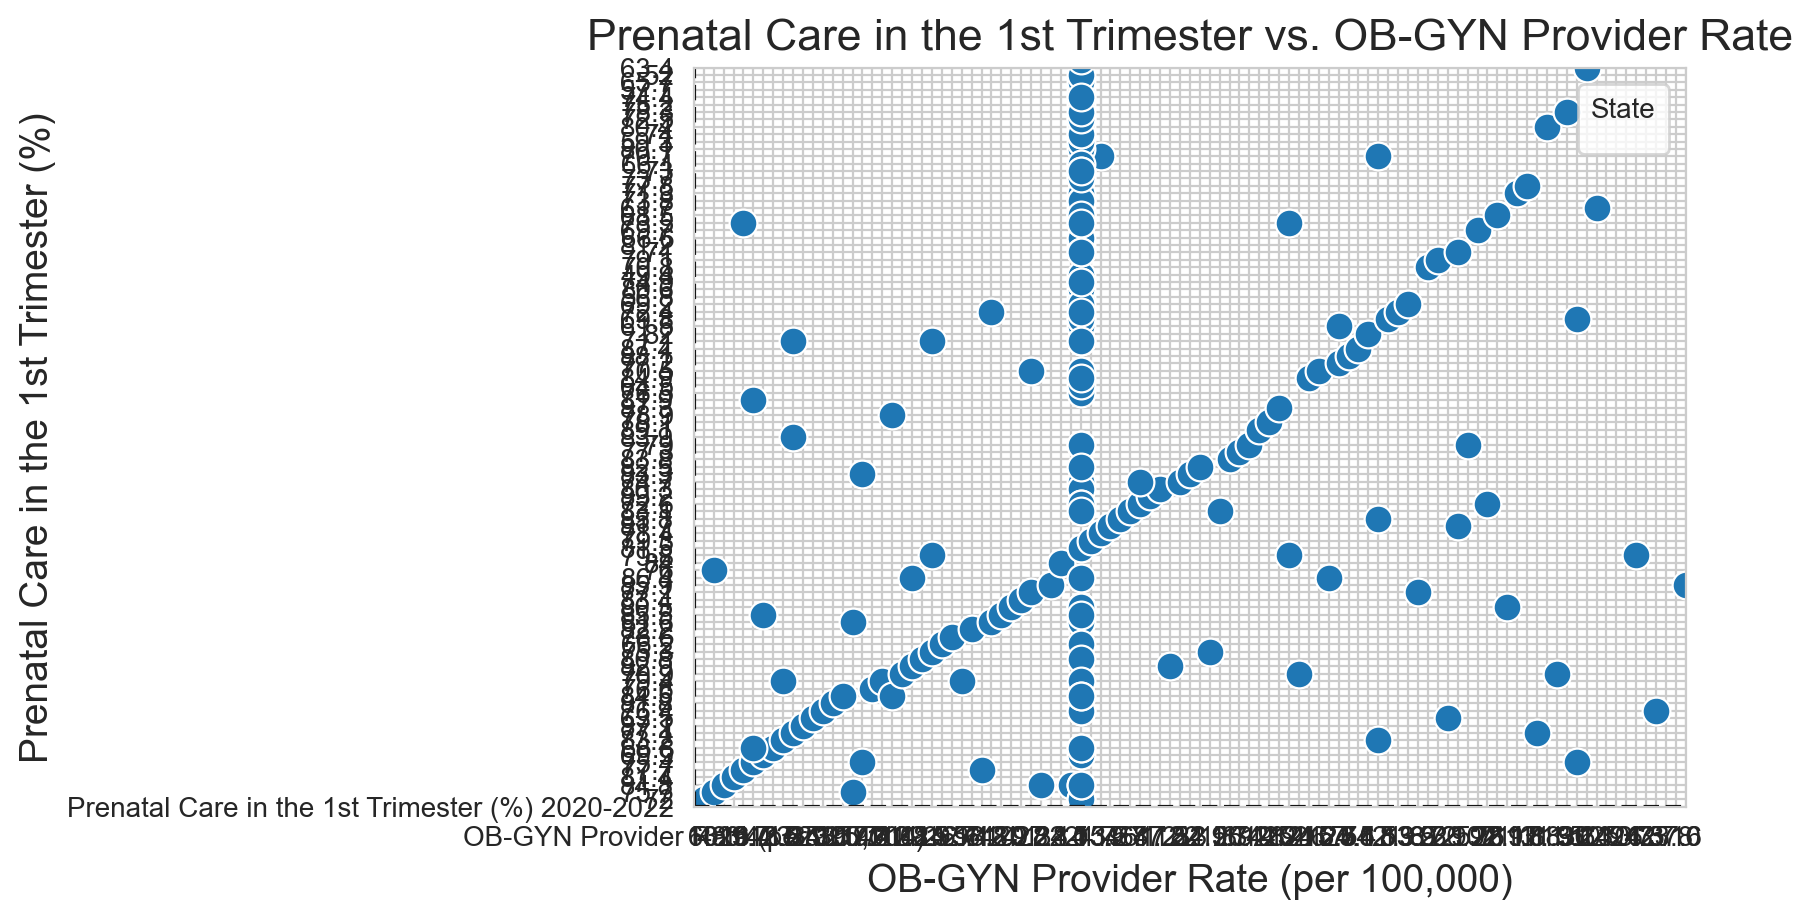

In [43]:
# can you make this chart a little more readable by changing the size of the points and the font size
seaborn.scatterplot(data=df, x='OB-GYN Provider Rate (per 100,000)', y='Prenatal Care in the 1st Trimester (%) 2020-2022', s=100)
matplotlib.pyplot.xlim(0, 100)
matplotlib.pyplot.ylim(0, 100)
matplotlib.pyplot.title('Prenatal Care in the 1st Trimester vs. OB-GYN Provider Rate', fontsize=16)
matplotlib.pyplot.xlabel('OB-GYN Provider Rate (per 100,000)', fontsize=14)
matplotlib.pyplot.ylabel('Prenatal Care in the 1st Trimester (%)', fontsize=14)
matplotlib.pyplot.legend(title='State', fontsize=12)
matplotlib.pyplot.axhline(y=0, color='black', linestyle='--')
matplotlib.pyplot.axvline(x=0, color='black', linestyle='--')
matplotlib.pyplot.show()


/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/1280808791.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State')


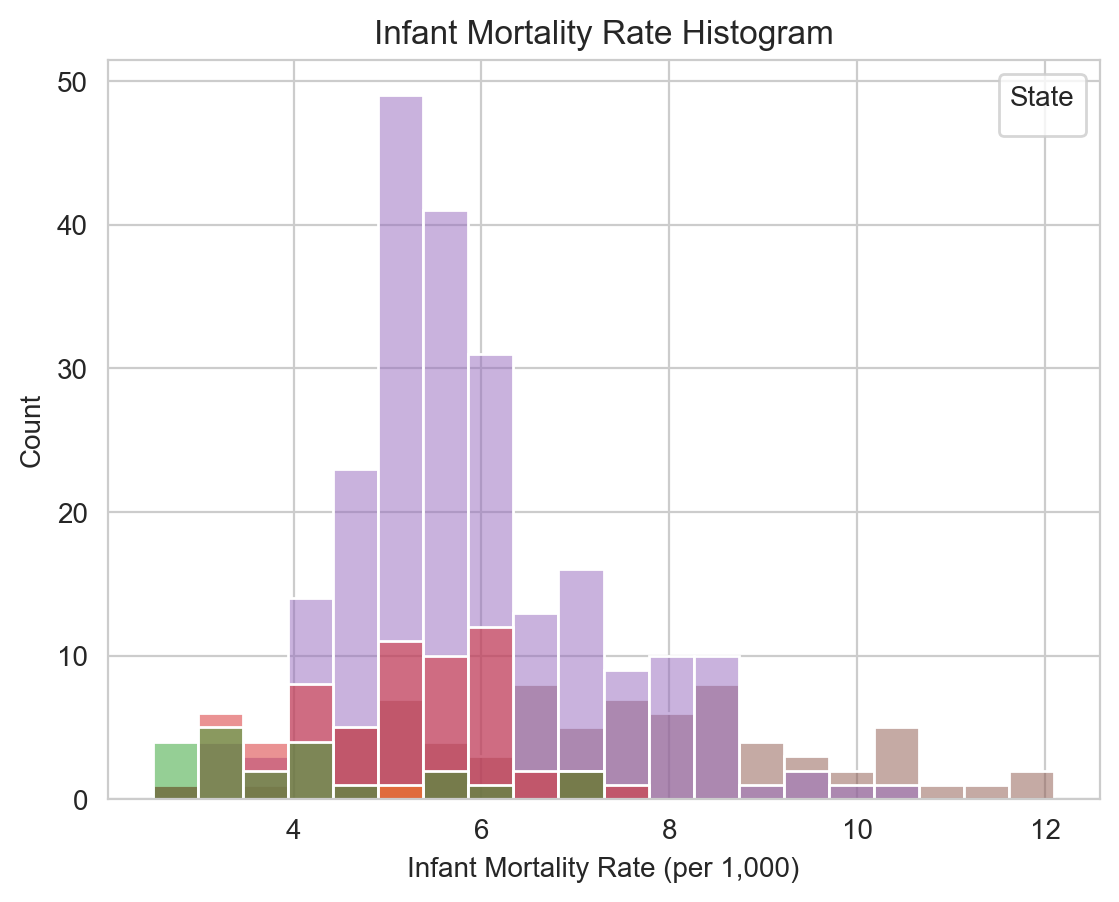

In [44]:
# can you make a histogram of the infant mortality rate with each state a different color
seaborn.histplot(data=df, x='Infant Mortality Rate (per 1,000) 2020-2022', hue='State', bins=20)
matplotlib.pyplot.title('Infant Mortality Rate Histogram')
matplotlib.pyplot.xlabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.legend(title='State')
matplotlib.pyplot.show()


/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/961080040.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State')


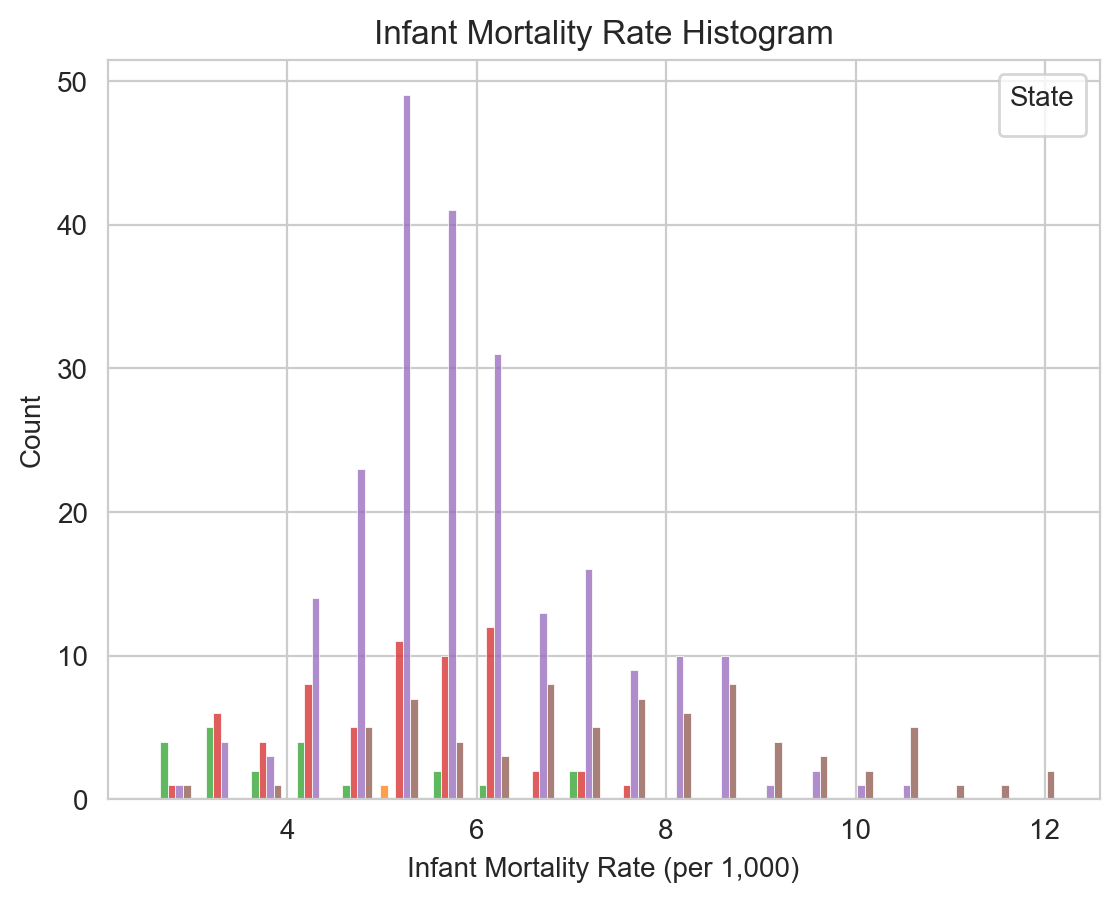

In [45]:
# can you have these histograms be side by side
seaborn.histplot(data=df, x='Infant Mortality Rate (per 1,000) 2020-2022', hue='State', bins=20, multiple="dodge")
matplotlib.pyplot.title('Infant Mortality Rate Histogram')
matplotlib.pyplot.xlabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.legend(title='State')
matplotlib.pyplot.show()

/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/46192491.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


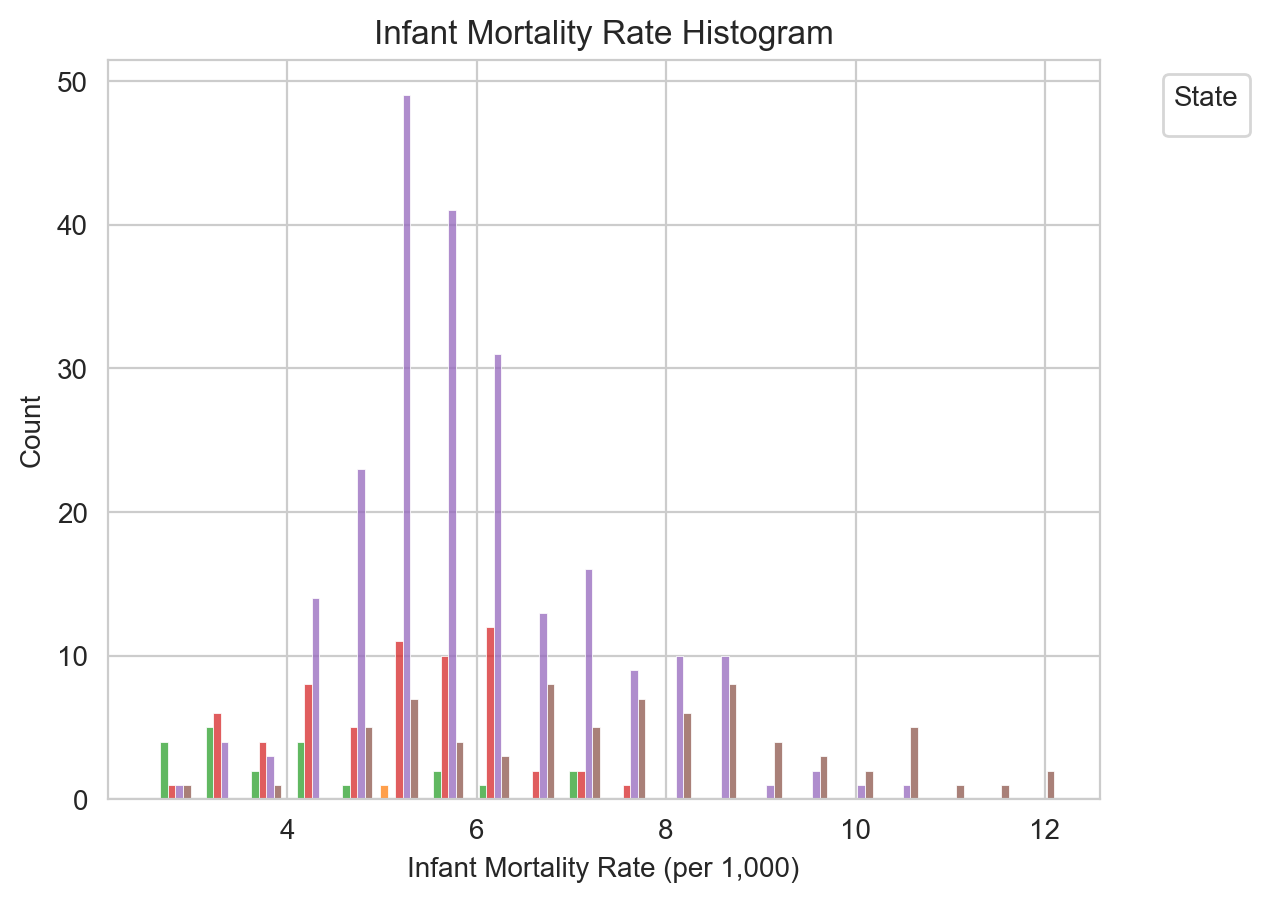

In [46]:
# can you include the states in the legend 
seaborn.histplot(data=df, x='Infant Mortality Rate (per 1,000) 2020-2022', hue='State', bins=20, multiple="dodge")
matplotlib.pyplot.title('Infant Mortality Rate Histogram')
matplotlib.pyplot.xlabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
matplotlib.pyplot.show()


/var/folders/q3/68365r8n1cv71829983lgcl00000gn/T/ipykernel_4688/565811018.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


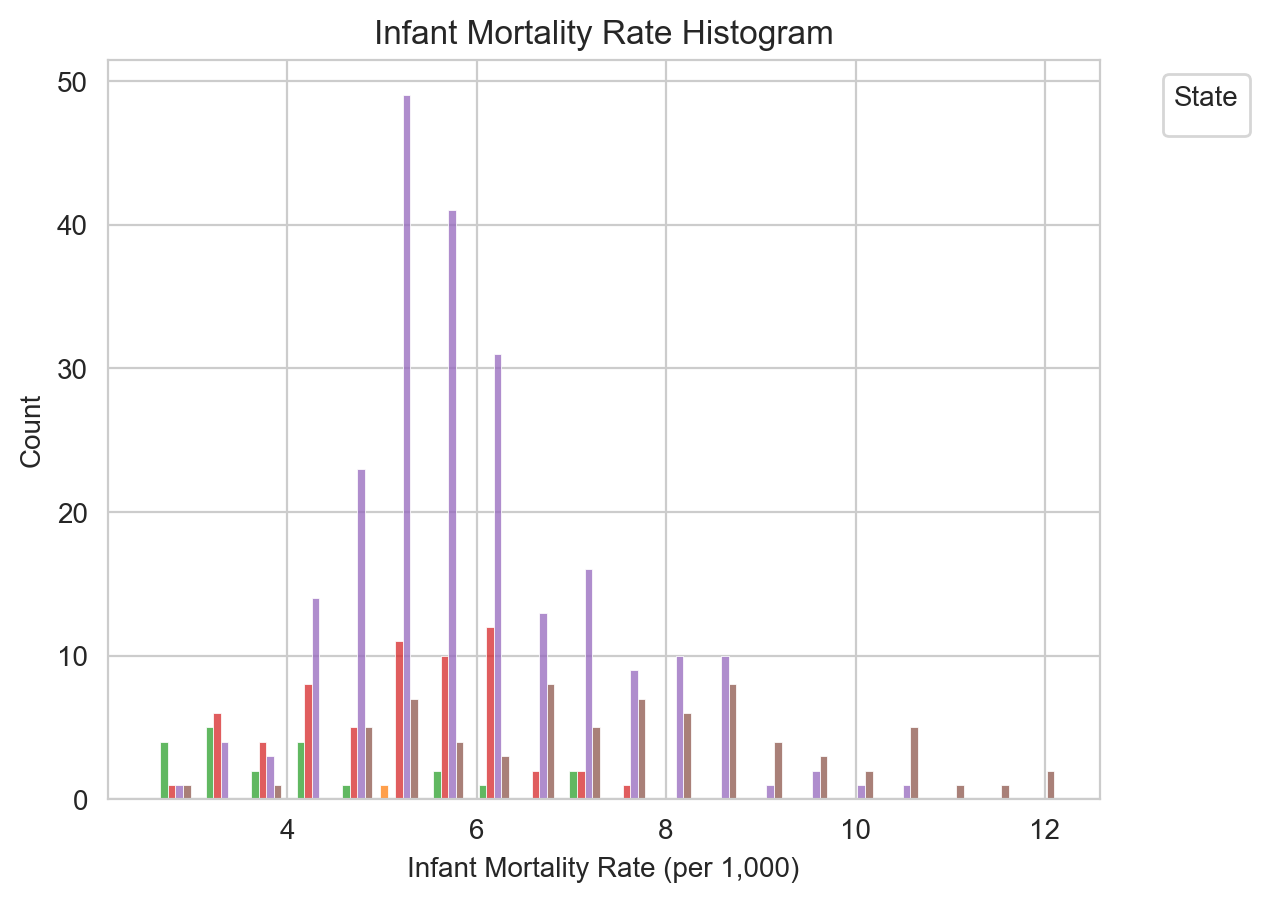

In [47]:
# tell me what color codes are used for the states when making the histogra
seaborn.histplot(data=df, x='Infant Mortality Rate (per 1,000) 2020-2022', hue='State', bins=20, multiple="dodge")
matplotlib.pyplot.title('Infant Mortality Rate Histogram')
matplotlib.pyplot.xlabel('Infant Mortality Rate (per 1,000)')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
matplotlib.pyplot.show()

Text(0.5, 1.0, 'Correlation Heatmap')

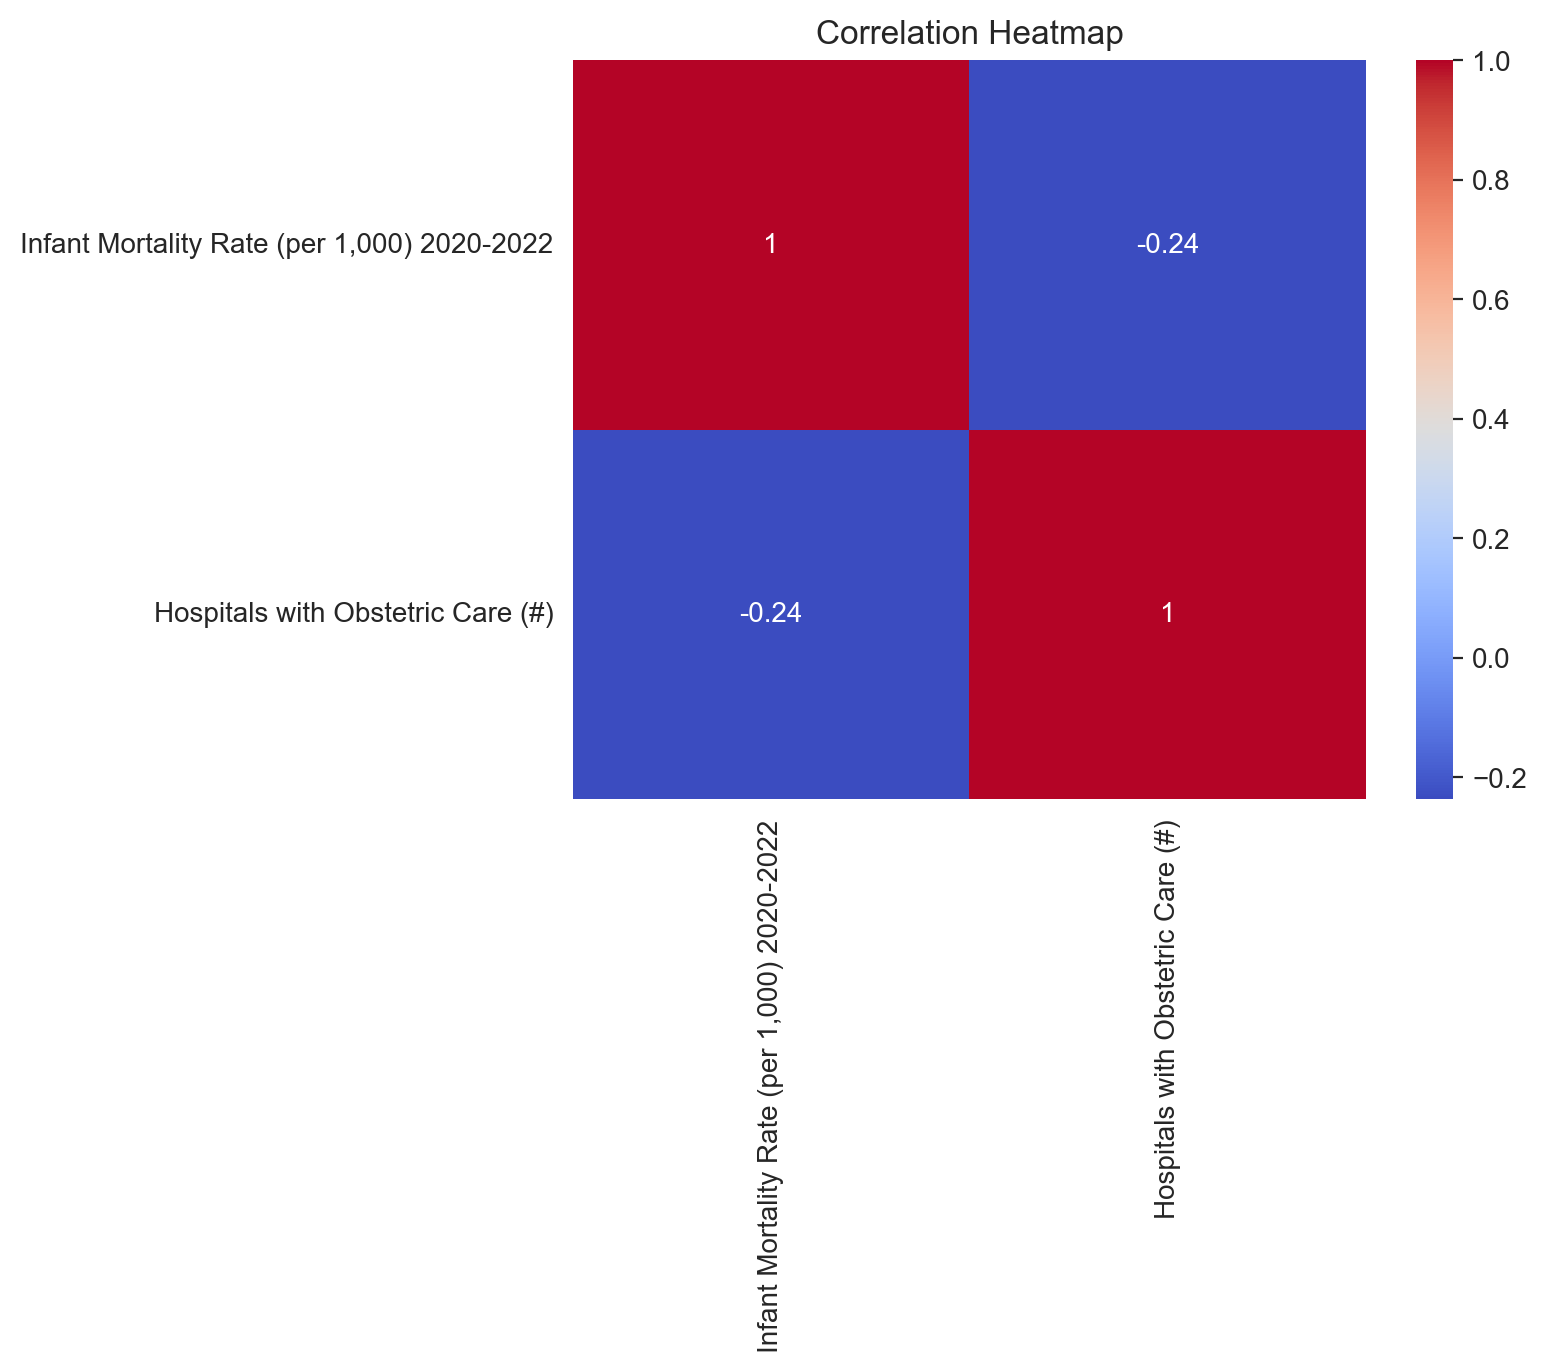

In [48]:
# create a heatmap comparing the infant mortality rate and the number of hospitals with obstetric care
seaborn.heatmap(df[['Infant Mortality Rate (per 1,000) 2020-2022', 'Hospitals with Obstetric Care (#)']].corr(), annot=True, cmap='coolwarm')
matplotlib.pyplot.title('Correlation Heatmap')


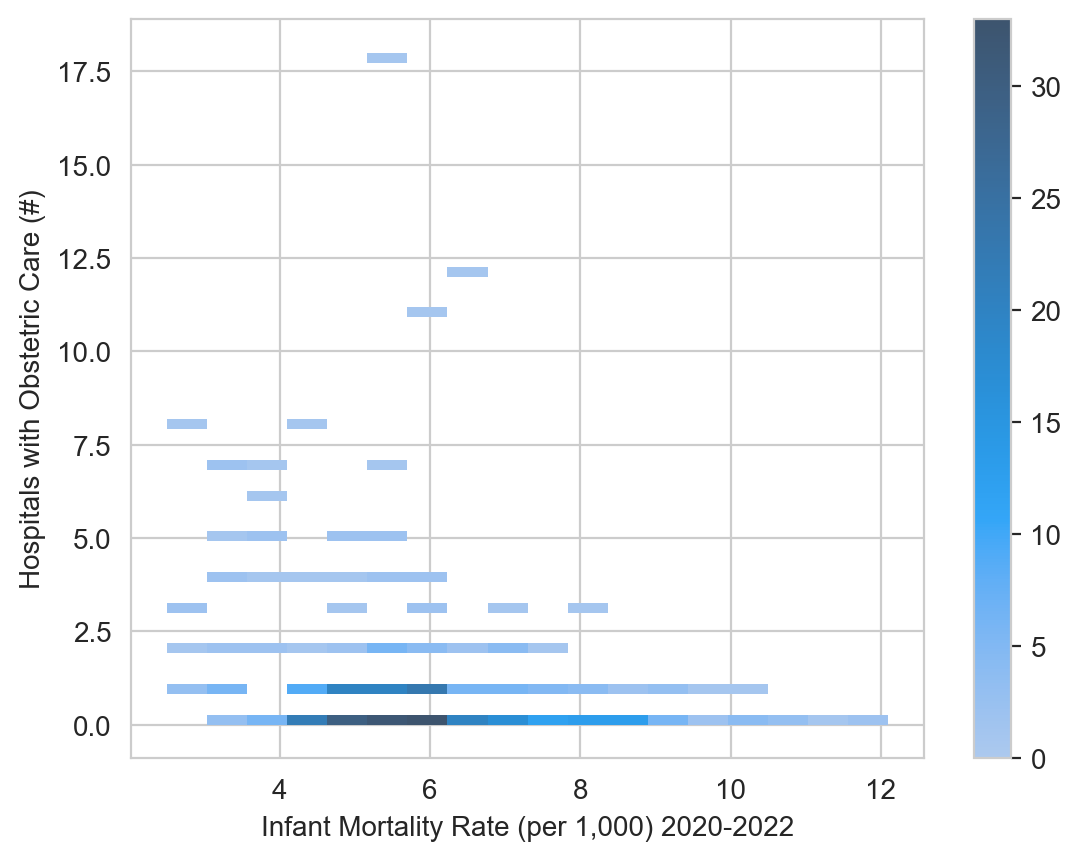

In [49]:
seaborn.histplot(data=df, x='Infant Mortality Rate (per 1,000) 2020-2022', y='Hospitals with Obstetric Care (#)', cbar=True) ;

confused on why they give me the first type of headmap when I ask the chat for it..

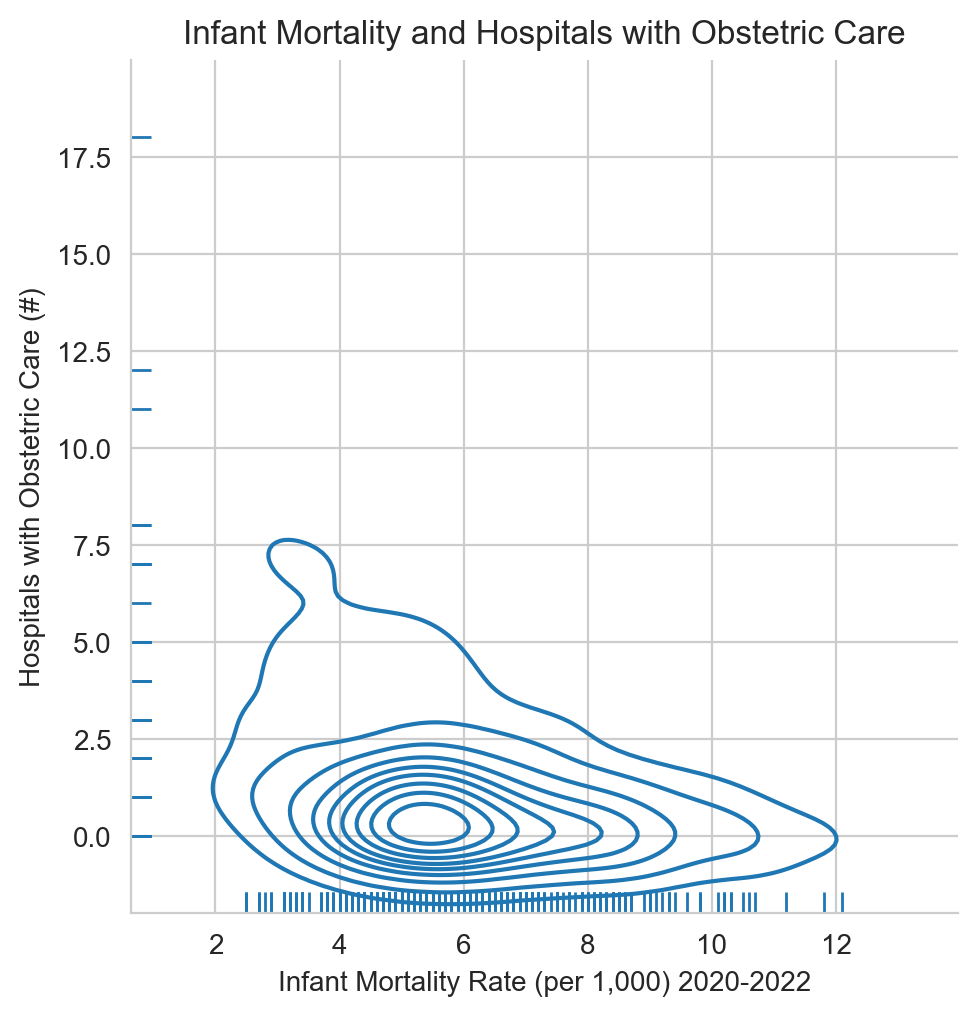

In [50]:
seaborn.displot(
    df,
    x='Infant Mortality Rate (per 1,000) 2020-2022',
    y='Hospitals with Obstetric Care (#)',
    kind='kde',
    rug=True
).set(
    title='Infant Mortality and Hospitals with Obstetric Care',
    xlabel='Infant Mortality Rate (per 1,000) 2020-2022',
    ylabel='Hospitals with Obstetric Care (#)'
);